<a href="https://colab.research.google.com/github/VictoriaReiShiro/Math_Models_In_Python/blob/master/%D0%A1%D0%B0%D1%85%D0%B0%D1%80%D0%BD%D1%8B%D0%B9_%D0%B4%D0%B8%D0%B0%D0%B1%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ситуация №1**

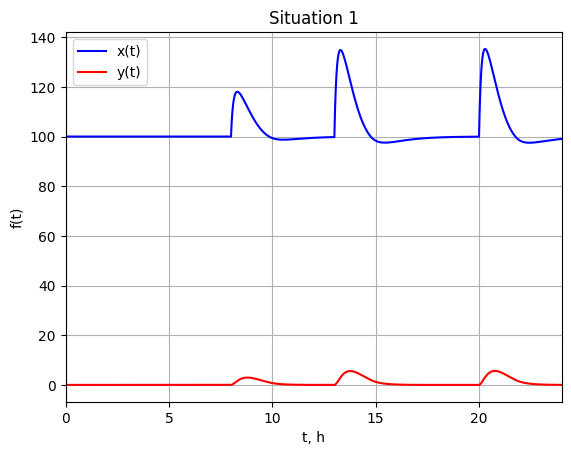

0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ступенчатая функция
def H(e):
    if e <= 0:
        return 0
    return 1

# Функция, описывающая потребление пищи по времени
def z(t, t0, Q, k):
    if t < t0:
        return 0
    return Q * np.exp(-k * (t - t0))

# Функция, описывающая введение инсулина (инъекциями) по времени
def w(t, t0, dT, Q):
    if (t - t0) >= 0 and (t - t0) <= dT:
        return Q / dT
    return 0

# Функция построения графиков
def plot(t, x, y, ttl=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, x, "-b")
    ax.plot(t, y, "-r")
    ax.grid()
    ax.set_xlabel("t, h")
    ax.set_ylabel("f(t)")
    ax.set_title(ttl)
    ax.legend(["x(t)", "y(t)"])
    ax.set_xlim([0, 24])
    plt.show()
    return 0

# Основная функция
def main():

    # Параметры модели
    x0 = 100
    y0 = 0
    k = 10

    # Коэффициенты в системе ДУ
    a1 = 0.05
    a2 = 1.0
    a3 = 4.0
    b1 = 0.5
    b2 = 2.0
    b3 = 0

    # Время приема пищи
    to = [8, 13, 20]


    # Количество еды в определенное выше время
    Qo = [50, 100, 100]

    # Время, когда следует принять инсулин
    ti = [0]

    # Количество инсулина в определенное выше время
    Qi = [0]

    # Время инъекции
    dT = 1

    # Основной расчет
    n = 10000
    t = np.linspace(0, 24, n)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    ind = 0
    indI = 0
    dt = t[1] - t[0]
    Qo.append(0)
    Qi.append(0)
    to.append(max(t))
    ti.append(max(t))
    for i in range(0, n - 1):
        if t[i] > to[ind] + 1:
            ind = ind + 1
        if t[i] > ti[indI] + dT:
            indI = indI + 1
        t0 = to[ind]
        Q = Qo[ind]
        tI = ti[indI]
        QI = Qi[indI]
        x[i + 1] = x[i] + dt * (
            -a1 * x[i] * y[i] + a2 * (x0 - x[i]) * H(x0 - x[i]) + a3 * z(t[i], t0, Q, k)
        )
        y[i + 1] = y[i] + dt * (
            b1 * (x[i] - x0) * H(x[i] - x0) - b2 * y[i] + b3 * w(t[i], tI, dT, QI)
        )

    # Вывод результата
    plot(t, x, y, "Situation 1")
    return 0

main()


**Ситуация №2**

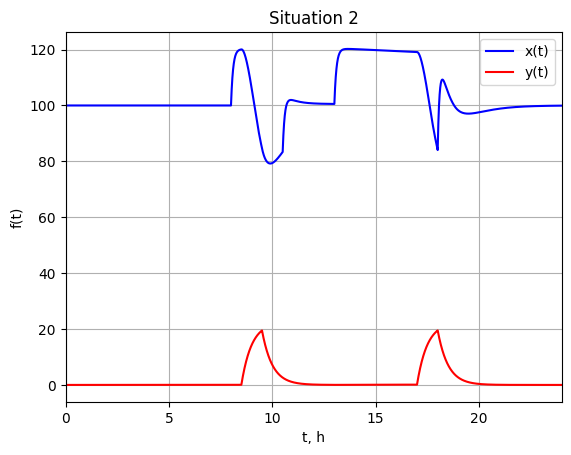

0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Ступенчатая функция
def H(e):
    if e <= 0:
        return 0
    return 1

# Функция, описывающая потребление пищи по времени
def z(t, t0, Q, k):
    if t < t0:
        return 0
    return Q * np.exp(-k * (t - t0))

# Функция, описывающая введение инсулина (инъекциями) по времени
def w(t, t0, dT, Q):
    if (t - t0) >= 0 and (t - t0) <= dT:
        return Q / dT
    return 0

# Функция построения графиков
def plot(t, x, y, ttl=""):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, x, "-b")
    ax.plot(t, y, "-r")
    ax.grid()
    ax.set_xlabel("t, h")
    ax.set_ylabel("f(t)")
    ax.set_title(ttl)
    ax.legend(["x(t)", "y(t)"])
    ax.set_xlim([0, 24])
    plt.show()
    return 0

# Основная функция
def main():

    # Параметры модели
    x0 = 100
    y0 = 0
    k = 10

    # Коэффициенты в системе ДУ
    a1 = 0.03
    a2 = 1.0
    a3 = 4.0
    b1 = 0.01
    b2 = 2.0
    b3 = 1.0

    # Время приема пищи
    to = [8, 10.5, 13, 18]

    # Количество еды в определенное выше время
    Qo = [50, 50, 50, 100]

    # Время, когда следует принять инсулин
    ti = [8.5, 17]


    # Количество инсулина в определенное выше время
    Qi = [45, 45]

    # Время инъекции
    dT = 1

    # Основной расчет
    n = 10000
    t = np.linspace(0, 24, n)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    ind = 0
    indI = 0
    dt = t[1] - t[0]
    Qo.append(0)
    Qi.append(0)
    to.append(max(t))
    ti.append(max(t))
    for i in range(0, n - 1):
        if t[i] > to[ind] + 1:
            ind = ind + 1
        if t[i] > ti[indI] + dT:
            indI = indI + 1
        t0 = to[ind]
        Q = Qo[ind]
        tI = ti[indI]
        QI = Qi[indI]
        x[i + 1] = x[i] + dt * (
            -a1 * x[i] * y[i] + a2 * (x0 - x[i]) * H(x0 - x[i]) + a3 * z(t[i], t0, Q, k)
        )
        y[i + 1] = y[i] + dt * (
            b1 * (x[i] - x0) * H(x[i] - x0) - b2 * y[i] + b3 * w(t[i], tI, dT, QI)
        )

    # Вывод результата
    plot(t, x, y, "Situation 2")
    return 0

main()
